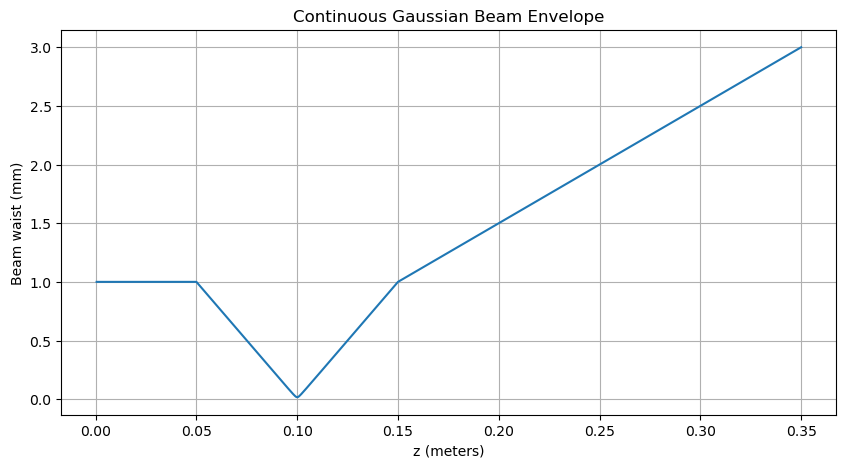

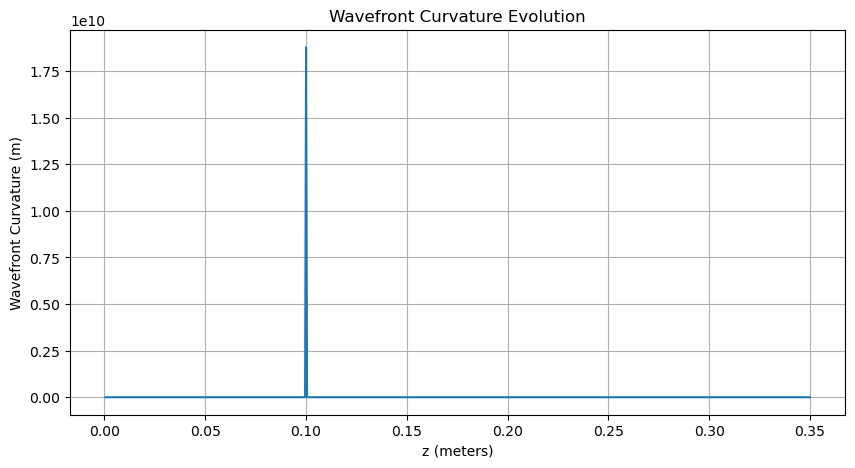

In [1]:
#%matplotlib inline
import sys, os
sys.path.append(os.path.abspath('../'))

from core.beam import GaussianBeam
from core.optical_elements import FreeSpace, Lens, Mirror
from core.system import System
import matplotlib.pyplot as plt

# 1. Create your beam
beam = GaussianBeam(wavelength=1064e-9, waist=1e-3)

# 2. Build your system
elements = [
    FreeSpace(0.05),      # 5 cm free space
    Lens(0.05),           # Lens f=5 cm
    FreeSpace(0.1),       # 10 cm free space
    Lens(0.10),           # Lens f=10 cm
    FreeSpace(0.1),       # 10 cm free space
    Mirror(),             # Flat mirror, just to show expansion
    FreeSpace(0.1)        # 10 cm free space
]

system = System(elements)

# 3. Propagate and plot
z, w, R = system.propagate(beam, dz=0.0005)  # smaller dz = smoother curves

plt.figure(figsize=(10,5))
plt.plot(z, w*1e3)
plt.xlabel('z (meters)')
plt.ylabel('Beam waist (mm)')
plt.title('Continuous Gaussian Beam Envelope')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(z, R)
plt.xlabel('z (meters)')
plt.ylabel('Wavefront Curvature (m)')
plt.title('Wavefront Curvature Evolution')
plt.grid(True)
plt.show()
